# Banking Call Data

## Exploratory Data Analysis

The BankingCallData dataset is a classification problem, which goal it is to predict if the client will subscribe a term deposit using 20 inputs. 

In [2]:
# Supress unnecessary warnings so that presentation looks clean
import warnings
warnings.filterwarnings('ignore')

# Import needed packages needed for EDA
import pandas as pd
import numpy as np

#Print all rows and columns. Dont hide any
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

### Data statistics

#### Raw data and shape

The dataset is not split into train and test data and has to be split later on.

In [3]:
bankingcalldata = pd.read_csv('datasets/BankingCallData/bank-additional/bank-additional-full.csv', sep=';')

print('Full dataset shape: ')
print(bankingcalldata.shape)

FileNotFoundError: File b'datasets/BankingCallData/bank-additional/bank-additional-full.csv' does not exist

In [1]:
bankingcalldata.dtypes

NameError: name 'bankingcalldata' is not defined

In [4]:
bankingcalldata.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


#### Description

There are no constants in this dataset that have to eliminated

In [5]:
bankingcalldata.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [6]:
bankingcalldata.skew()

age               0.784697
duration          3.263141
campaign          4.762507
pdays            -4.922190
previous          3.832042
emp.var.rate     -0.724096
cons.price.idx   -0.230888
cons.conf.idx     0.303180
euribor3m        -0.709188
nr.employed      -1.044262
dtype: float64

### Data Visualization - Continious

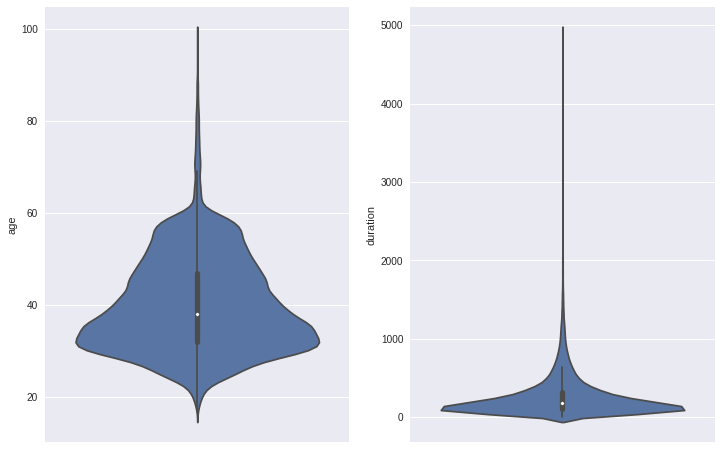

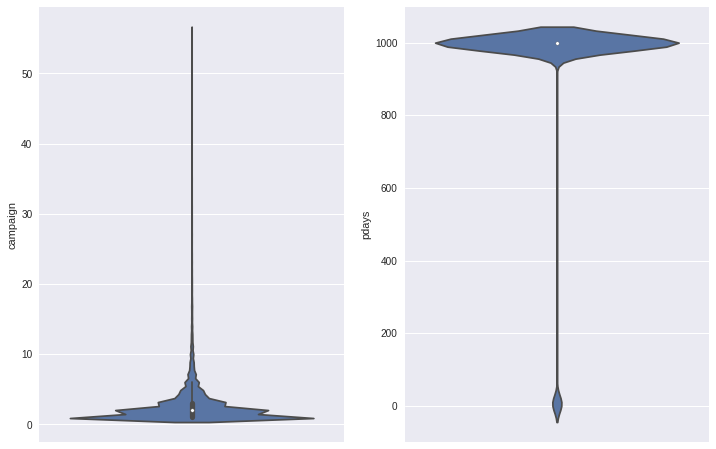

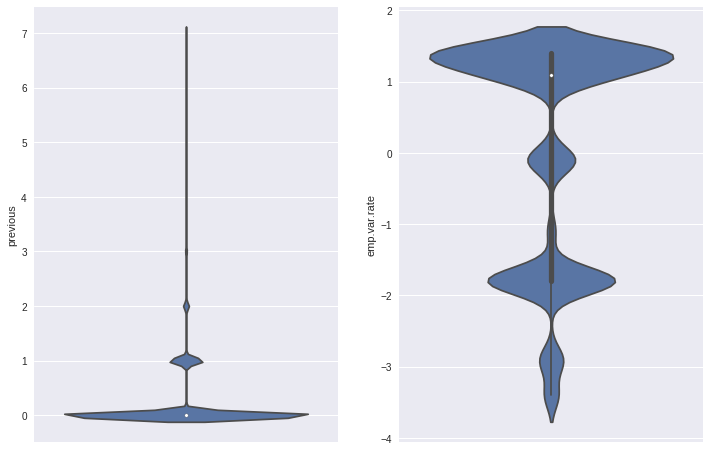

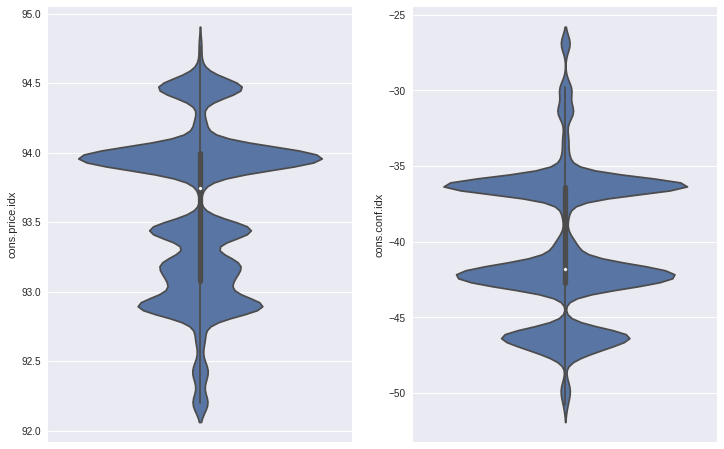

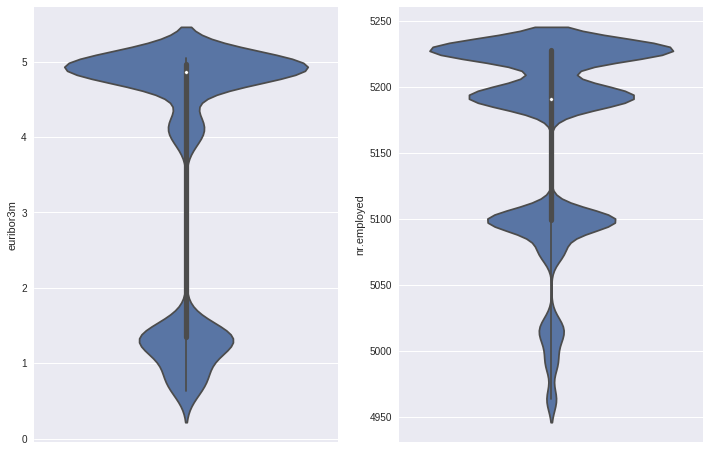

In [7]:
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

#create a dataframe with only continuous features
data = bankingcalldata.select_dtypes(include=['float64', 'int64'])

#get the names of all the columns
cols = data.columns 

#Plot violin for all attributes in a 7x2 grid
n_cols = 2
n_rows = 5

for i in range(n_rows):
    fg,ax = plt.subplots(nrows=1,ncols=n_cols,figsize=(12, 8))
    for j in range(n_cols):
        sns.violinplot(y=cols[i*n_cols+j], data=bankingcalldata, ax=ax[j])
        
plt.show()

### Data Interaction

#### Correlation

In [8]:
# Calculates pearson co-efficient for all combinations
data_corr = data.corr()

# Set the threshold to select only highly correlated attributes
threshold = 0.5

#number of features considered
size = data.shape[1]

# List of pairs along with correlation above threshold
corr_list = []

#Search for the highly correlated pairs
for i in range(0,size): #for 'size' features
    for j in range(i+1,size): #avoid repetition
        if (data_corr.iloc[i,j] >= threshold and data_corr.iloc[i,j] < 1) or (data_corr.iloc[i,j] < 0 and data_corr.iloc[i,j] <= -threshold):
            corr_list.append([data_corr.iloc[i,j],i,j]) #store correlation and columns index

#Sort to show higher ones first            
s_corr_list = sorted(corr_list,key=lambda x: -abs(x[0]))

#Print correlations and column names
for v,i,j in s_corr_list:
    print ("%s and %s = %.2f" % (cols[i],cols[j],v))


emp.var.rate and euribor3m = 0.97
euribor3m and nr.employed = 0.95
emp.var.rate and nr.employed = 0.91
emp.var.rate and cons.price.idx = 0.78
cons.price.idx and euribor3m = 0.69
pdays and previous = -0.59
cons.price.idx and nr.employed = 0.52
previous and nr.employed = -0.50


#### Scatter plot

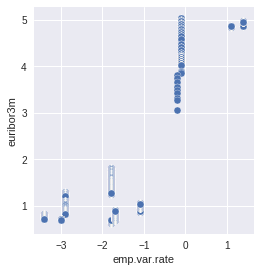

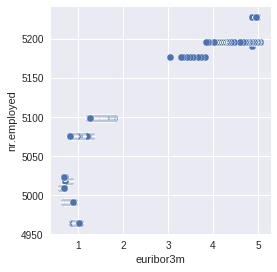

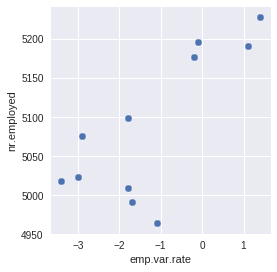

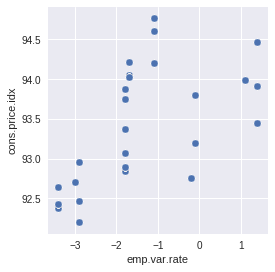

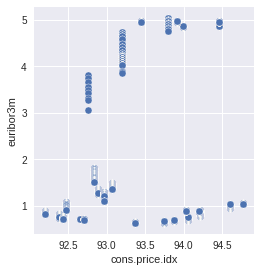

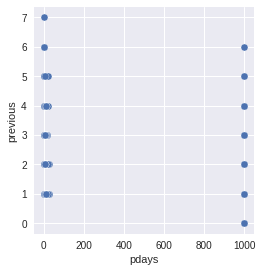

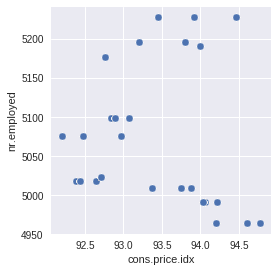

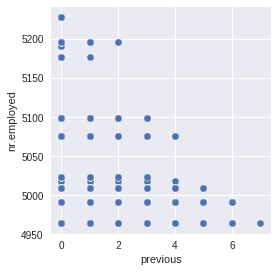

In [9]:
# Scatter plot of only the highly correlated pairs
for v,i,j in s_corr_list:
    sns.pairplot(bankingcalldata, size=4, x_vars=cols[i],y_vars=cols[j] )
    plt.show()

#### Count of values

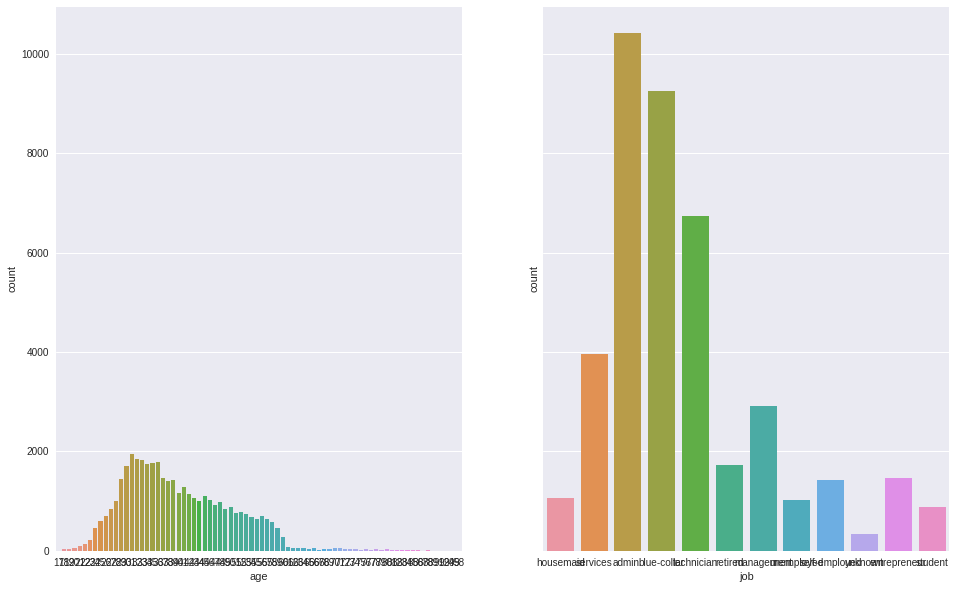

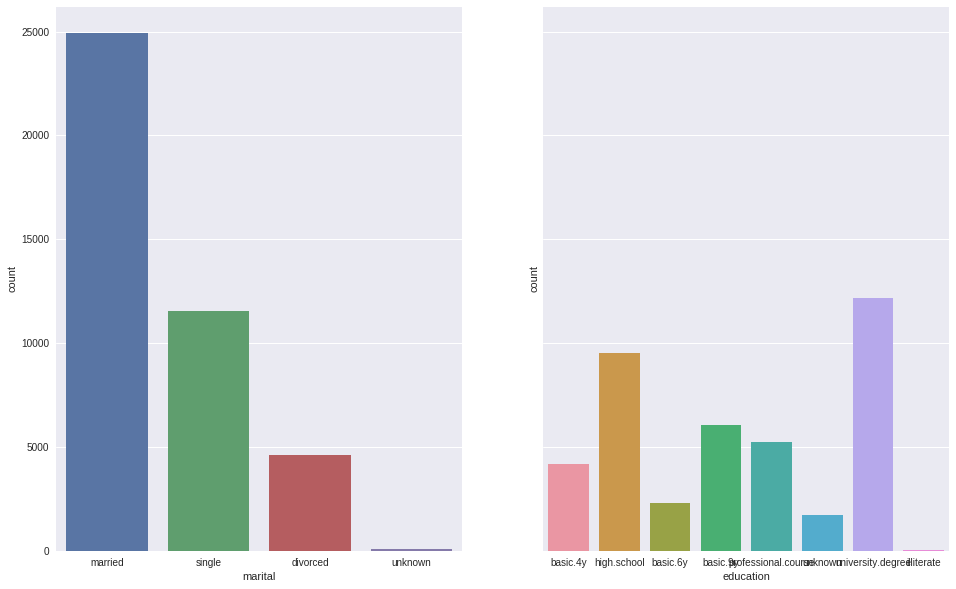

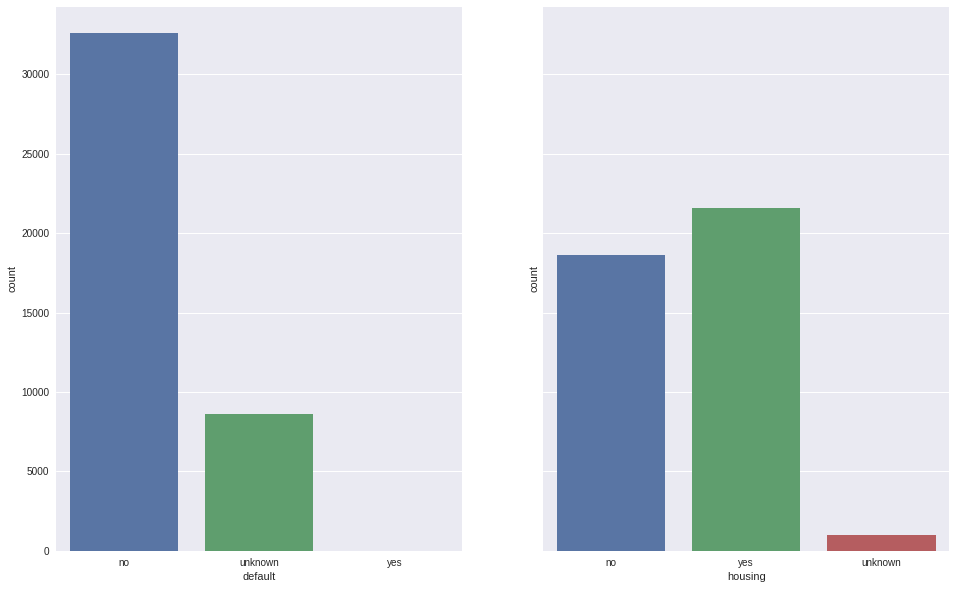

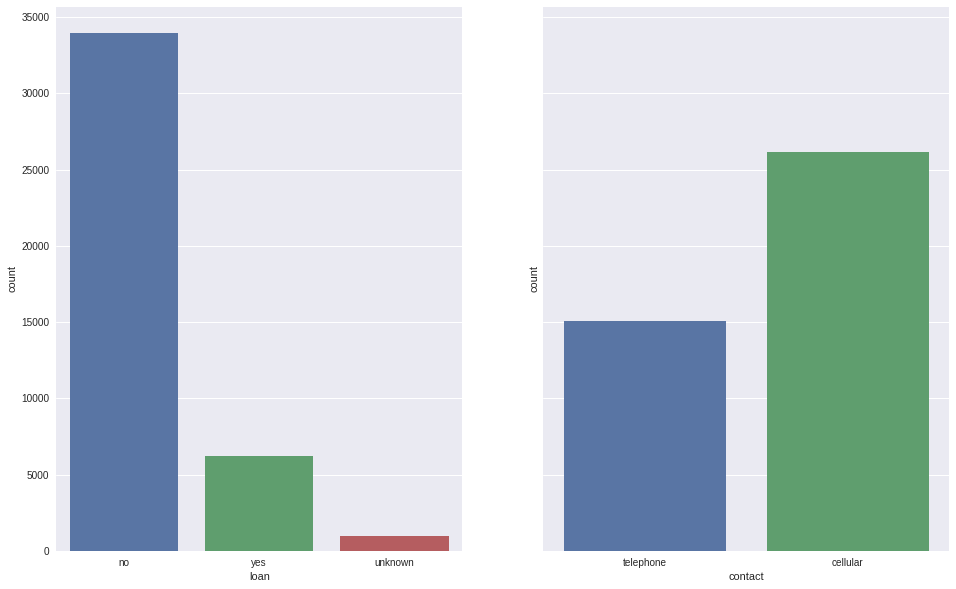

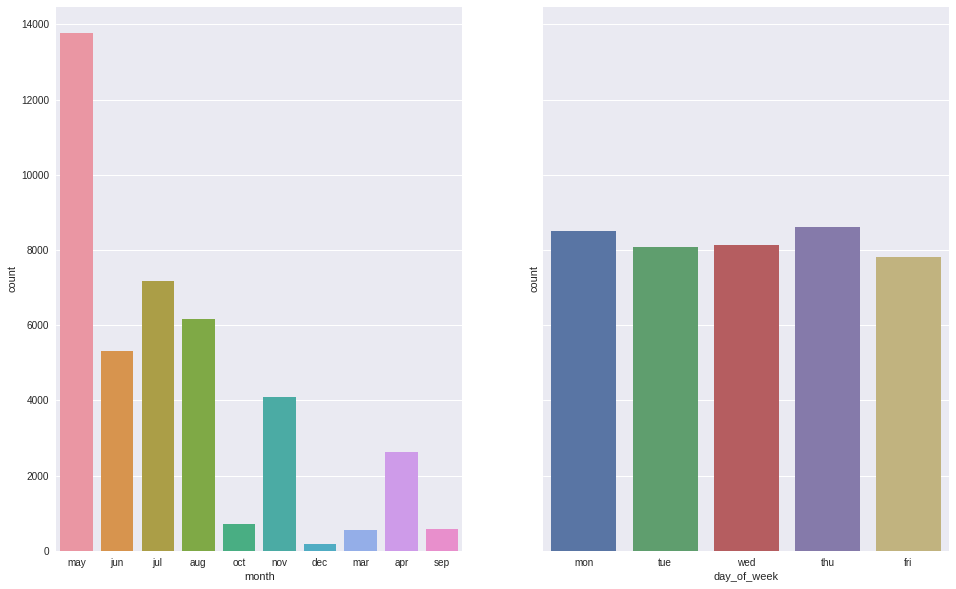

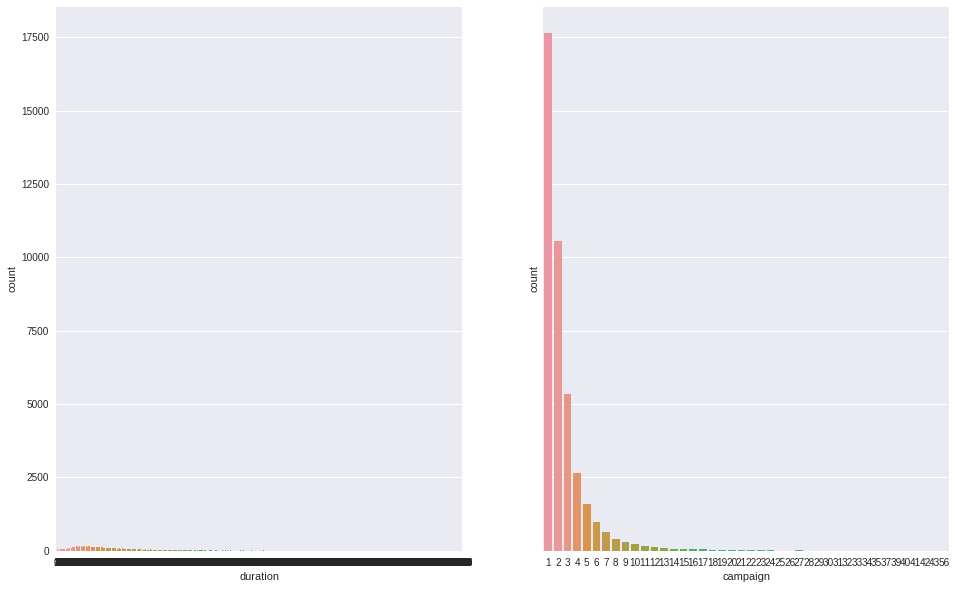

In [10]:
# Count of each label in each category

#names of all the columns
cols = bankingcalldata.columns

#Plot count plot for all attributes in a 29x4 grid
n_cols = 2
n_rows = 6
for i in range(n_rows):
    fg,ax = plt.subplots(nrows=1,ncols=n_cols,sharey=True,figsize=(16, 10))
    for j in range(n_cols):
        sns.countplot(x=cols[i*n_cols+j], data=bankingcalldata, ax=ax[j])
plt.show()

### Data Preparation

#### Test for missing values

In [11]:
from datetime import datetime
from sklearn.metrics import mean_absolute_error, accuracy_score, average_precision_score, recall_score, confusion_matrix
from scipy.stats import skew, boxcox
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, StratifiedKFold, KFold

import itertools

if bankingcalldata.isnull().values.any() == True:
    print('There are missing values in the dataset.')
else:
    print('There are no missing values in the dataset.')

columns = list(bankingcalldata.columns)
    
for column in columns:
    if bankingcalldata[column].isnull().values.any() == True:
        print('There are missing values in the column ' + column)

There are no missing values in the dataset.


In [12]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

ONE_HOT = False

#Variable to hold the list of variables for an attribute in the train and test data
labels = []
to_be_encoded = ['job','marital','education','default','housing','loan','contact','month','day_of_week','previous',
                 'poutcome']

print('Encoding categorical columns..')

for i in bankingcalldata.columns.values:
    if bankingcalldata[i].dtype == object:
        lbl = preprocessing.LabelEncoder()
        bankingcalldata[i] = lbl.fit_transform(bankingcalldata[i])

for i in range(len(to_be_encoded)):
    labels.append(list(bankingcalldata[to_be_encoded[i]].unique()))
    
#One hot encode all categorical attributes
cats = []
encoded_data = bankingcalldata.drop('y', axis=1)
        
#One hot encode
if ONE_HOT:
    for i in range(len(to_be_encoded)):
        feature = encoded_data[to_be_encoded[i]]
        feature = feature.reshape(encoded_data.shape[0], 1)
        onehot_encoder = OneHotEncoder(sparse=False,n_values=len(labels[i]))
        feature = onehot_encoder.fit_transform(feature)
        cats.append(feature)

    # Make a 2D array from a list of 1D arrays
    encoded_cats = np.column_stack(cats)

    # Print the shape of the encoded data
    print(encoded_cats.shape)

    #Concatenate encoded attributes with continuous attributes
    bankingcalldata_encoded = encoded_data.drop(to_be_encoded, axis=1)
    bankingcalldata_encoded = np.concatenate((encoded_cats,bankingcalldata_encoded),axis=1)
    
    bankingcalldata_encoded = pd.DataFrame(bankingcalldata_encoded)
    
    print('Checking datatypes..')
    tmp = 0
    for i in bankingcalldata_encoded.columns.values:
        if bankingcalldata_encoded[i].dtype == object:
            tmp = tmp + 1
    if tmp == 0:
        print('All columns are encoded.')
    else:
        print('Not all columns are encoded')
    
else:
    print('Checking datatypes..')
    tmp = 0
    for i in bankingcalldata.columns.values:
        if bankingcalldata[i].dtype == object:
            tmp = tmp + 1
    if tmp == 0:
        print('All columns are encoded.')
    else:
        print('Not all columns are encoded')

print('Finished.')

Encoding categorical columns..
Checking datatypes..
All columns are encoded.
Finished.


In [13]:
if ONE_HOT:
    X_full = bankingcalldata_encoded
else:
    X_full = bankingcalldata.drop('y', axis=1) 
    
y_full = bankingcalldata['y']
X_train, X_test, y_train, y_test = train_test_split(X_full, y_full, test_size=0.40, random_state=42)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

print(y_full.value_counts())


(24712, 20)
(16476, 20)
(24712,)
(16476,)
0    36548
1     4640
Name: y, dtype: int64


In [54]:
def accuracy(array):
    TN = array[0,0]
    TP = array[1,1]
    FN = array[1,0]
    FP = array[0,1]
    
    return((TP + TN) / (TN + TP + FN + FP))
def precision(array):
    TN = array[0,0]
    TP = array[1,1]
    FN = array[1,0]
    FP = array[0,1]
    
    return(TP / (TP + FP))
def recall(array):
    TN = array[0,0]
    TP = array[1,1]
    FN = array[1,0]
    FP = array[0,1]
    
    return(TP / (TP + FN))

In [56]:
#Import the library
from sklearn.linear_model import RidgeClassifier

def ridge_model(alpha, X, y):
    
    ridge_model = RidgeClassifier(alpha, fit_intercept= True, normalize=True)
    ridge_model.fit(X, y)
    return ridge_model

n_folds = 10
alpha = 0.1
i = 0

skf = StratifiedKFold(n_splits=n_folds, random_state=123, shuffle=True)

for (train_index, test_index) in skf.split(X_train, y_train):
    # cross-validation randomly splits train data into train and validation data
    print('\n Fold %d' % (i + 1))
    
    X_train_cv, X_val_cv = X_train.iloc[train_index], X_train.iloc[test_index]
    y_train_cv, y_val_cv = y_train.iloc[train_index], y_train.iloc[test_index]
 
    # declare your model
    model = ridge_model(alpha, X_train_cv, y_train_cv)
    
    # predict train and validation set accuracy and get eval metrics
    scores_cv = model.predict(X_train_cv)
    scores_val = model.predict(X_val_cv)

    train_confusion_matrix = confusion_matrix(y_train_cv, np.around(scores_cv).astype(int))
    val_confusion_matrix = confusion_matrix(y_val_cv, np.around(scores_val).astype(int))

    train_pc = accuracy(train_confusion_matrix)
    train_pp = precision(train_confusion_matrix)
    train_re = recall(train_confusion_matrix)
    print('\n train-Accuracy: %.6f' % train_pc)
    print(' train-Precision: %.6f' % train_pp)
    print(' train-Recall: %.6f' % train_re)
    
    eval_pc = accuracy(val_confusion_matrix)
    eval_pp = precision(val_confusion_matrix)
    eval_re = recall(val_confusion_matrix)
    print('\n eval-Accuracy: %.6f' % eval_pc)
    print(' eval-Precision: %.6f' % eval_pp)
    print(' eval-Recall: %.6f' % eval_re)


    # predict the test data and add it to the other predictions
    test_pred = model.predict(X_test)
    train_pred = model.predict(X_train)
    full_pred = model.predict(X_full)
    
    if i > 0:
        temp_sum_train = sum_train_pred + train_pred
        temp_sum_test = sum_test_pred + test_pred
        temp_sum_full = sum_full_pred + full_pred
    else:
        temp_sum_train = train_pred
        temp_sum_test = test_pred
        temp_sum_full = full_pred
    sum_train_pred = temp_sum_train
    sum_test_pred = temp_sum_test
    sum_full_pred = temp_sum_full

    
    i = i+1




 Fold 1

 train-Accuracy: 0.904721
 train-Precision: 0.700309
 train-Recall: 0.271132

 eval-Accuracy: 0.908981
 eval-Precision: 0.714286
 eval-Recall: 0.322581

 Fold 2

 train-Accuracy: 0.905171
 train-Precision: 0.701312
 train-Recall: 0.277113

 eval-Accuracy: 0.906958
 eval-Precision: 0.742574
 eval-Recall: 0.268817

 Fold 3

 train-Accuracy: 0.904631
 train-Precision: 0.697651
 train-Recall: 0.272329

 eval-Accuracy: 0.907767
 eval-Precision: 0.742857
 eval-Recall: 0.279570

 Fold 4

 train-Accuracy: 0.905126
 train-Precision: 0.701010
 train-Recall: 0.276715

 eval-Accuracy: 0.907362
 eval-Precision: 0.727273
 eval-Recall: 0.286738

 Fold 5

 train-Accuracy: 0.904496
 train-Precision: 0.694332
 train-Recall: 0.273525

 eval-Accuracy: 0.907767
 eval-Precision: 0.752475
 eval-Recall: 0.272401

 Fold 6

 train-Accuracy: 0.904501
 train-Precision: 0.697531
 train-Recall: 0.270335

 eval-Accuracy: 0.908539
 eval-Precision: 0.722689
 eval-Recall: 0.308244

 Fold 7

 train-Accuracy: 0

In [57]:
# divide predictions and CV-sum by number of folds to get mean of all folds
final_train_pred_ridge = sum_train_pred / (n_folds)
final_test_pred_ridge = sum_test_pred / (n_folds)
final_full_pred_ridge = sum_full_pred / (n_folds)

train_confusion_matrix_ridge = confusion_matrix(y_train, np.around(final_train_pred_ridge).astype(int))
test_confusion_matrix_ridge = confusion_matrix(y_test, np.around(final_test_pred_ridge).astype(int))
full_confusion_matrix_ridge = confusion_matrix(y_full, np.around(final_full_pred_ridge).astype(int))

final_train_accuracy_ridge = accuracy(train_confusion_matrix_ridge)
final_train_precision_ridge = precision(train_confusion_matrix_ridge)
final_train_recall_ridge = recall(train_confusion_matrix_ridge)

final_test_accuracy_ridge = accuracy(test_confusion_matrix_ridge)
final_test_precision_ridge = precision(test_confusion_matrix_ridge)
final_test_recall_ridge = recall(test_confusion_matrix_ridge)

final_full_accuracy_ridge = accuracy(full_confusion_matrix_ridge)
final_full_precision_ridge = precision(full_confusion_matrix_ridge)
final_full_recall_ridge = recall(full_confusion_matrix_ridge)

print('\n Average Ridge full-Accuracy: %.6f' % final_full_accuracy_ridge)
print(' Average Ridge full-Precision: %.6f' % final_full_precision_ridge)
print(' Average Ridge full-Recall: %.6f' % final_full_recall_ridge)


 Average Ridge full-Accuracy: 0.905094
 Average Ridge full-Precision: 0.697888
 Average Ridge full-Recall: 0.277802


In [58]:
import xgboost as xgb


def xgb_model(d_train, d_valid):
    
    params = {
        'learning_rate': 0.1,
        'n_estimators': 1000,
        'max_depth': 5,
        'min_child_weight': 1,
        'gamma': 0,
        'subsample': 0.8,
        'colsample_bytree': 0.8,
        'objective': 'multi:softmax',
        'nthread': -1,
        'scale_pos_weight': 1,
        'seed': 27,
        'eval_metric': 'mlogloss',
        'num_class': 2,
    }

    watchlist = [(d_train, 'train'), (d_valid, 'eval')]

    xgb_model = xgb.train(params,
                          d_train,
                          10000, # number of rounds
                          watchlist,
                          early_stopping_rounds = 50,
                          verbose_eval=50
                          )
    return xgb_model

n_folds = 10
i = 0

skf = StratifiedKFold(n_splits=n_folds, random_state=123, shuffle=True)

for (train_index, test_index) in skf.split(X_train, y_train):
    # cross-validation randomly splits train data into train and validation data
    print('\n Fold %d' % (i + 1))

    X_train_cv, X_val_cv = X_train.iloc[train_index], X_train.iloc[test_index]
    y_train_cv, y_val_cv = y_train.iloc[train_index], y_train.iloc[test_index]

    d_train = xgb.DMatrix(X_train_cv, label=y_train_cv)
    d_valid = xgb.DMatrix(X_val_cv, label=y_val_cv)
    d_train_full = xgb.DMatrix(X_train)
    d_test = xgb.DMatrix(X_test)
    d_full = xgb.DMatrix(X_full)
 

    # declare your model
    model = xgb_model(d_train, d_valid)
    
    # predict the train, test and full data and add it to the other predictions
    train_pred = model.predict(d_train_full, ntree_limit=model.best_ntree_limit)  
    test_pred = model.predict(d_test, ntree_limit=model.best_ntree_limit)
    full_pred = model.predict(d_full, ntree_limit=model.best_ntree_limit)

    
    if i > 0:
        temp_sum_train = sum_train_pred + train_pred
        temp_sum_test = sum_test_pred + test_pred
        temp_sum_full = sum_full_pred + full_pred
    else:
        temp_sum_train = train_pred
        temp_sum_test = test_pred
        temp_sum_full = full_pred
    sum_train_pred = temp_sum_train
    sum_test_pred = temp_sum_test
    sum_full_pred = temp_sum_full
    
    i = i+1




 Fold 1
[0]	train-mlogloss:0.619882	eval-mlogloss:0.620483
Multiple eval metrics have been passed: 'eval-mlogloss' will be used for early stopping.

Will train until eval-mlogloss hasn't improved in 50 rounds.
[50]	train-mlogloss:0.159731	eval-mlogloss:0.176613
[100]	train-mlogloss:0.143701	eval-mlogloss:0.172621
[150]	train-mlogloss:0.131469	eval-mlogloss:0.172863
Stopping. Best iteration:
[128]	train-mlogloss:0.136664	eval-mlogloss:0.172153


 Fold 2
[0]	train-mlogloss:0.619722	eval-mlogloss:0.62155
Multiple eval metrics have been passed: 'eval-mlogloss' will be used for early stopping.

Will train until eval-mlogloss hasn't improved in 50 rounds.
[50]	train-mlogloss:0.158909	eval-mlogloss:0.187403
[100]	train-mlogloss:0.142962	eval-mlogloss:0.183598
[150]	train-mlogloss:0.130715	eval-mlogloss:0.181844
[200]	train-mlogloss:0.120917	eval-mlogloss:0.182731
Stopping. Best iteration:
[151]	train-mlogloss:0.130563	eval-mlogloss:0.181778


 Fold 3
[0]	train-mlogloss:0.619973	eval-mlogloss

In [59]:
# divide predictions and CV-sum by number of folds to get mean of all folds
final_train_pred_xgb = sum_train_pred / (n_folds)
final_test_pred_xgb = sum_test_pred / (n_folds)
final_full_pred_xgb = sum_full_pred / (n_folds)

train_confusion_matrix_xgb = confusion_matrix(y_train, np.around(final_train_pred_xgb).astype(int))
test_confusion_matrix_xgb = confusion_matrix(y_test, np.around(final_test_pred_xgb).astype(int))
full_confusion_matrix_xgb = confusion_matrix(y_full, np.around(final_full_pred_xgb).astype(int))

final_train_accuracy_xgb = accuracy(train_confusion_matrix_xgb)
final_train_precision_xgb = precision(train_confusion_matrix_xgb)
final_train_recall_xgb = recall(train_confusion_matrix_xgb)

final_test_accuracy_xgb = accuracy(test_confusion_matrix_xgb)
final_test_precision_xgb = precision(test_confusion_matrix_xgb)
final_test_recall_xgb = recall(test_confusion_matrix_xgb)

final_full_accuracy_xgb = accuracy(full_confusion_matrix_xgb)
final_full_precision_xgb = precision(full_confusion_matrix_xgb)
final_full_recall_xgb = recall(full_confusion_matrix_xgb)

print('\n Average XGB accuracy: %.6f' % final_full_accuracy_xgb)
print('\n Average XGB precision: %.6f' % final_full_precision_xgb)
print('\n Average XGB recall: %.6f' % final_full_recall_xgb)


 Average XGB accuracy: 0.930562

 Average XGB precision: 0.740931

 Average XGB recall: 0.589871


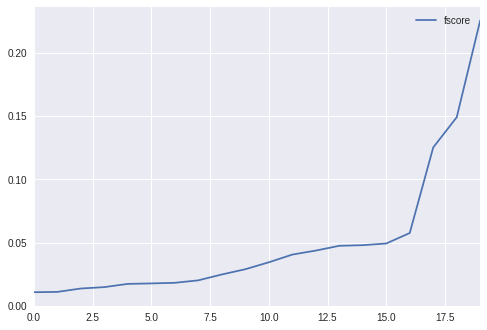

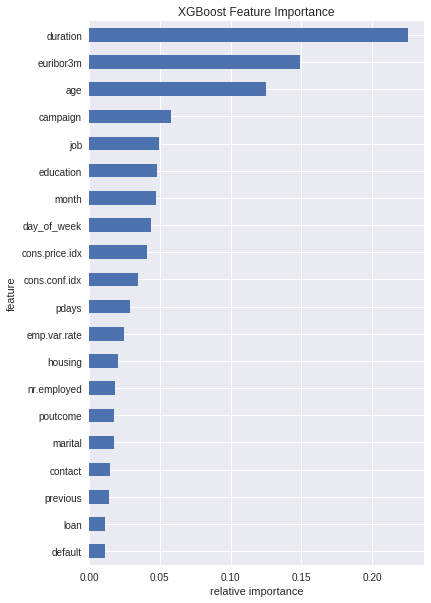

In [19]:
import operator

importance = model.get_fscore()
importance = sorted(importance.items(), key=operator.itemgetter(1))

df = pd.DataFrame(importance, columns=['feature', 'fscore'])
df['fscore'] = df['fscore'] / df['fscore'].sum()

plt.figure()
df.plot()
df.plot(kind='barh', x='feature', y='fscore', legend=False, figsize=(6, 10))
plt.title('XGBoost Feature Importance')
plt.xlabel('relative importance')
plt.show()

In [60]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.layers.normalization import BatchNormalization
from keras.layers.advanced_activations import PReLU
from keras.wrappers.scikit_learn import KerasClassifier



def nn_model(X_train_cv, X_val_cv, y_train_cv, y_val_cv):
    # create model
    model = Sequential()
    model.add(Dense(60, input_dim=X_train_cv.shape[1], kernel_initializer='normal', activation='relu'))
    model.add(Dense(30, kernel_initializer='normal', activation='relu'))
    model.add(Dense(1, kernel_initializer='normal', activation='sigmoid'))
    # Compile model
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    
    model.fit(np.array(X_train_cv), np.array(y_train_cv), epochs=10, verbose=2, validation_data=(np.array(X_val_cv), np.array(y_val_cv)))

    return model 


n_folds = 10
i = 0

skf = StratifiedKFold(n_splits=n_folds, random_state=123, shuffle=True)

for (train_index, test_index) in skf.split(X_train, y_train):
    # cross-validation randomly splits train data into train and validation data
    print('\n Fold %d' % (i + 1))

    X_train_cv, X_val_cv = X_train.iloc[train_index], X_train.iloc[test_index]
    y_train_cv, y_val_cv = y_train.iloc[train_index], y_train.iloc[test_index]
   
    # declare your model
    model = nn_model(X_train_cv, X_val_cv, y_train_cv, y_val_cv)
    
    
    # predict the train, test and full data and add it to the other predictions
    train_pred = np.around(model.predict_proba(np.array(X_train), verbose=None))  
    test_pred = np.around(model.predict_proba(np.array(X_test), verbose=None))
    full_pred = np.around(model.predict_proba(np.array(X_full), verbose=None))
    
    if i > 0:
        temp_sum_train = sum_train_pred + train_pred
        temp_sum_test = sum_test_pred + test_pred
        temp_sum_full = sum_full_pred + full_pred
    else:
        temp_sum_train = train_pred
        temp_sum_test = test_pred
        temp_sum_full = full_pred
    sum_train_pred = temp_sum_train
    sum_test_pred = temp_sum_test
    sum_full_pred = temp_sum_full
    
    i = i + 1


 Fold 1
Train on 22240 samples, validate on 2472 samples
Epoch 1/10
0s - loss: 0.3068 - acc: 0.8944 - val_loss: 0.2510 - val_acc: 0.9037
Epoch 2/10
0s - loss: 0.2519 - acc: 0.8994 - val_loss: 0.2323 - val_acc: 0.9078
Epoch 3/10
0s - loss: 0.2426 - acc: 0.9012 - val_loss: 0.2283 - val_acc: 0.9057
Epoch 4/10
0s - loss: 0.2324 - acc: 0.9022 - val_loss: 0.2668 - val_acc: 0.9041
Epoch 5/10
0s - loss: 0.2284 - acc: 0.9020 - val_loss: 0.2424 - val_acc: 0.8993
Epoch 6/10
0s - loss: 0.2240 - acc: 0.9021 - val_loss: 0.2149 - val_acc: 0.9061
Epoch 7/10
0s - loss: 0.2206 - acc: 0.9028 - val_loss: 0.2251 - val_acc: 0.9029
Epoch 8/10
0s - loss: 0.2166 - acc: 0.9033 - val_loss: 0.2083 - val_acc: 0.9078
Epoch 9/10
0s - loss: 0.2178 - acc: 0.9048 - val_loss: 0.2135 - val_acc: 0.9074
Epoch 10/10
0s - loss: 0.2151 - acc: 0.9055 - val_loss: 0.2096 - val_acc: 0.9082

 Fold 2
Train on 22240 samples, validate on 2472 samples
Epoch 1/10
0s - loss: 14.1446 - acc: 0.1128 - val_loss: 14.1431 - val_acc: 0.1129
E

0s - loss: 0.2148 - acc: 0.9039 - val_loss: 0.2166 - val_acc: 0.9065
Epoch 7/10
0s - loss: 0.2119 - acc: 0.9046 - val_loss: 0.2131 - val_acc: 0.9097
Epoch 8/10
0s - loss: 0.2122 - acc: 0.9056 - val_loss: 0.2487 - val_acc: 0.9085
Epoch 9/10
0s - loss: 0.2140 - acc: 0.9049 - val_loss: 0.2192 - val_acc: 0.9077
Epoch 10/10
0s - loss: 0.2104 - acc: 0.9052 - val_loss: 0.2242 - val_acc: 0.9069


In [61]:
# divide predictions and CV-sum by number of folds to get mean of all folds
final_train_pred_nn = sum_train_pred / (n_folds)
final_test_pred_nn = sum_test_pred / (n_folds)
final_full_pred_nn = sum_full_pred / (n_folds)

train_confusion_matrix_nn = confusion_matrix(y_train, np.around(final_train_pred_nn).astype(int))
test_confusion_matrix_nn = confusion_matrix(y_test, np.around(final_test_pred_nn).astype(int))
full_confusion_matrix_nn = confusion_matrix(y_full, np.around(final_full_pred_nn).astype(int))

final_train_accuracy_nn = accuracy(train_confusion_matrix_nn)
final_train_precision_nn = precision(train_confusion_matrix_nn)
final_train_recall_nn = recall(train_confusion_matrix_nn)

final_test_accuracy_nn = accuracy(test_confusion_matrix_nn)
final_test_precision_nn = precision(test_confusion_matrix_nn)
final_test_recall_nn = recall(test_confusion_matrix_nn)

final_full_accuracy_nn = accuracy(full_confusion_matrix_nn)
final_full_precision_nn = precision(full_confusion_matrix_nn)
final_full_recall_nn = recall(full_confusion_matrix_nn)

print('\n Average Keras accuracy: %.6f' % final_full_accuracy_nn)
print('\n Average Keras precision: %.6f' % final_full_precision_nn)
print('\n Average Keras recall: %.6f' % final_full_recall_nn)


 Average Keras accuracy: 0.908177

 Average Keras precision: 0.668367

 Average Keras recall: 0.367026


### LightGBM

In [63]:
# import os
# from pylightgbm.models import GBMClassifier
# os.environ['LIGHTGBM_EXEC'] = "/opt/LightGBM/lightgbm"


# def lightgbm(X_train, y_train, X_val, y_val):
#     #create model
#     gbmr = GBMRegressor(
#         exec_path="/opt/LightGBM/lightgbm", # change this to your LighGBM path
#         num_threads=4,
#         boosting_type = 'gbdt',
#         num_iterations=10000,
#         learning_rate=0.1,
#         num_leaves=90,
#         max_bin = 2500,
#         max_depth = -1,
#         min_data_in_leaf=5,
#         min_sum_hessian_in_leaf = 5,
#         metric='l1',
#         feature_fraction=0.7,
#         feature_fraction_seed=seed,
#         bagging_fraction=0.9,
#         bagging_freq=0,
#         bagging_seed=seed,
#         lambda_l1 = 20,
#         lambda_l2 = 0,
#         metric_freq=1,
#         early_stopping_round=200,
#         verbose= True
#         )  
    
#     gbmr.fit(X_train, y_train, test_data=[(X_val, y_val)])


    
# n_folds = 10
# i = 0
# seed = 42

# skf = StratifiedKFold(n_splits=n_folds, random_state=123, shuffle=True)

# for (train_index, test_index) in skf.split(X_train, y_train):
#     # cross-validation randomly splits train data into train and validation data
#     print('\n Fold %d' % (i + 1))

#     X_train_cv, X_val_cv = X_train.iloc[train_index], X_train.iloc[test_index]
#     y_train_cv, y_val_cv = y_train.iloc[train_index], y_train.iloc[test_index]
   
#     # declare your model
#     model = lightgbm(X_train_cv, y_train_cv, X_val_cv, y_val_cv)

    
#     # predict the train, test and full data and add it to the other predictions
#     train_pred = np.around(model.predict_proba(np.array(X_train), verbose=None))  
#     test_pred = np.around(model.predict_proba(np.array(X_test), verbose=None))
#     full_pred = np.around(model.predict_proba(np.array(X_full), verbose=None))
    
#     if i > 0:
#         temp_sum_train = sum_train_pred + train_pred
#         temp_sum_test = sum_test_pred + test_pred
#         temp_sum_full = sum_full_pred + full_pred
#     else:
#         temp_sum_train = train_pred
#         temp_sum_test = test_pred
#         temp_sum_full = full_pred
#     sum_train_pred = temp_sum_train
#     sum_test_pred = temp_sum_test
#     sum_full_pred = temp_sum_full
    
#     i = i + 1


## Ensemble

In [64]:
# Create new ensemble data
X_ensemble = pd.DataFrame()
X_ensemble['XGB'] = final_full_pred_xgb
X_ensemble['Keras'] = np.array(final_full_pred_nn[:,0])
X_ensemble['Ridge'] = final_full_pred_ridge

X_train_ensemble, X_test_ensemble, y_train_ensemble, y_test_ensemble = train_test_split(X_ensemble, y_full, test_size=0.40, random_state=42)

### XGBoost Ensemble

In [65]:
n_folds = 10
i = 0

skf = StratifiedKFold(n_splits=n_folds, random_state=123, shuffle=True)

for (train_index, test_index) in skf.split(X_train_ensemble, y_train_ensemble):
    # cross-validation randomly splits train data into train and validation data
    print('\n Fold %d' % (i + 1))

    X_train_cv, X_val_cv = X_train_ensemble.iloc[train_index], X_train_ensemble.iloc[test_index]
    y_train_cv, y_val_cv = y_train_ensemble.iloc[train_index], y_train_ensemble.iloc[test_index]

    d_train = xgb.DMatrix(X_train_cv, label=y_train_cv)
    d_valid = xgb.DMatrix(X_val_cv, label=y_val_cv)
    d_train_full = xgb.DMatrix(X_train_ensemble)
    d_test = xgb.DMatrix(X_test_ensemble)
    d_full = xgb.DMatrix(X_ensemble)
 

    # declare your model
    model = xgb_model(d_train, d_valid)
    
    # predict the train, test and full data and add it to the other predictions
    train_pred = model.predict(d_train_full, ntree_limit=model.best_ntree_limit)  
    test_pred = model.predict(d_test, ntree_limit=model.best_ntree_limit)
    full_pred = model.predict(d_full, ntree_limit=model.best_ntree_limit)

    
    if i > 0:
        temp_sum_train = sum_train_pred + train_pred
        temp_sum_test = sum_test_pred + test_pred
        temp_sum_full = sum_full_pred + full_pred
    else:
        temp_sum_train = train_pred
        temp_sum_test = test_pred
        temp_sum_full = full_pred
    sum_train_pred = temp_sum_train
    sum_test_pred = temp_sum_test
    sum_full_pred = temp_sum_full
    
    i = i+1



 Fold 1
[0]	train-mlogloss:0.621404	eval-mlogloss:0.621397
Multiple eval metrics have been passed: 'eval-mlogloss' will be used for early stopping.

Will train until eval-mlogloss hasn't improved in 50 rounds.
[50]	train-mlogloss:0.186717	eval-mlogloss:0.188961
[100]	train-mlogloss:0.185242	eval-mlogloss:0.187489
[150]	train-mlogloss:0.184859	eval-mlogloss:0.187589
Stopping. Best iteration:
[113]	train-mlogloss:0.185096	eval-mlogloss:0.187354


 Fold 2
[0]	train-mlogloss:0.621177	eval-mlogloss:0.622045
Multiple eval metrics have been passed: 'eval-mlogloss' will be used for early stopping.

Will train until eval-mlogloss hasn't improved in 50 rounds.
[50]	train-mlogloss:0.184892	eval-mlogloss:0.203268
Stopping. Best iteration:
[47]	train-mlogloss:0.185287	eval-mlogloss:0.203194


 Fold 3
[0]	train-mlogloss:0.62131	eval-mlogloss:0.62101
Multiple eval metrics have been passed: 'eval-mlogloss' will be used for early stopping.

Will train until eval-mlogloss hasn't improved in 50 rounds.


In [66]:
# divide predictions and CV-sum by number of folds to get mean of all folds
final_train_pred_ens_xgb = sum_train_pred / (n_folds)
final_test_pred_ens_xgb = sum_test_pred / (n_folds)
final_full_pred_ens_xgb = sum_full_pred / (n_folds)

train_confusion_matrix_ens_xgb = confusion_matrix(y_train, np.around(final_train_pred_ens_xgb).astype(int))
test_confusion_matrix_ens_xgb = confusion_matrix(y_test, np.around(final_test_pred_ens_xgb).astype(int))
full_confusion_matrix_ens_xgb = confusion_matrix(y_full, np.around(final_full_pred_ens_xgb).astype(int))

final_train_accuracy_ens_xgb = accuracy(train_confusion_matrix_ens_xgb)
final_train_precision_ens_xgb = precision(train_confusion_matrix_ens_xgb)
final_train_recall_ens_xgb = recall(train_confusion_matrix_ens_xgb)

final_test_accuracy_ens_xgb = accuracy(test_confusion_matrix_ens_xgb)
final_test_precision_ens_xgb = precision(test_confusion_matrix_ens_xgb)
final_test_recall_ens_xgb = recall(test_confusion_matrix_ens_xgb)

final_full_accuracy_ens_xgb = accuracy(full_confusion_matrix_ens_xgb)
final_full_precision_ens_xgb = precision(full_confusion_matrix_ens_xgb)
final_full_recall_ens_xgb = recall(full_confusion_matrix_ens_xgb)

print('\n Average Ensemble accuracy (XGB): %.6f' % final_full_accuracy_ens_xgb)
print('\n Average Ensemble precision (XGB): %.6f' % final_full_precision_ens_xgb)
print('\n Average Ensemble recall (XGB): %.6f' % final_full_recall_ens_xgb)


 Average Ensemble accuracy (XGB): 0.932626

 Average Ensemble precision (XGB): 0.733183

 Average Ensemble recall (XGB): 0.631897


### Keras Ensemble

In [67]:
n_folds = 10
i = 0

skf = StratifiedKFold(n_splits=n_folds, random_state=123, shuffle=True)

for (train_index, test_index) in skf.split(X_train_ensemble, y_train_ensemble):
    # cross-validation randomly splits train data into train and validation data
    print('\n Fold %d' % (i + 1))

    X_train_cv, X_val_cv = X_train_ensemble.iloc[train_index], X_train_ensemble.iloc[test_index]
    y_train_cv, y_val_cv = y_train_ensemble.iloc[train_index], y_train_ensemble.iloc[test_index]
   
    # declare your model
    model = nn_model(X_train_cv, X_val_cv, y_train_cv, y_val_cv)
    
    
    # predict the train, test and full data and add it to the other predictions
    train_pred = np.around(model.predict_proba(np.array(X_train_ensemble), verbose=None))  
    test_pred = np.around(model.predict_proba(np.array(X_test_ensemble), verbose=None))
    full_pred = np.around(model.predict_proba(np.array(X_ensemble), verbose=None))
    
    if i > 0:
        temp_sum_train = sum_train_pred + train_pred
        temp_sum_test = sum_test_pred + test_pred
        temp_sum_full = sum_full_pred + full_pred
    else:
        temp_sum_train = train_pred
        temp_sum_test = test_pred
        temp_sum_full = full_pred
    sum_train_pred = temp_sum_train
    sum_test_pred = temp_sum_test
    sum_full_pred = temp_sum_full
    
    i = i + 1


 Fold 1
Train on 22240 samples, validate on 2472 samples
Epoch 1/10
0s - loss: 0.2587 - acc: 0.9311 - val_loss: 0.1994 - val_acc: 0.9417
Epoch 2/10
0s - loss: 0.1992 - acc: 0.9395 - val_loss: 0.1947 - val_acc: 0.9417
Epoch 3/10
0s - loss: 0.1969 - acc: 0.9388 - val_loss: 0.1924 - val_acc: 0.9417
Epoch 4/10
0s - loss: 0.1954 - acc: 0.9387 - val_loss: 0.1908 - val_acc: 0.9417
Epoch 5/10
0s - loss: 0.1945 - acc: 0.9388 - val_loss: 0.1902 - val_acc: 0.9426
Epoch 6/10
0s - loss: 0.1938 - acc: 0.9392 - val_loss: 0.1899 - val_acc: 0.9430
Epoch 7/10
0s - loss: 0.1926 - acc: 0.9394 - val_loss: 0.1898 - val_acc: 0.9426
Epoch 8/10
0s - loss: 0.1926 - acc: 0.9400 - val_loss: 0.1890 - val_acc: 0.9430
Epoch 9/10
0s - loss: 0.1920 - acc: 0.9400 - val_loss: 0.1890 - val_acc: 0.9426
Epoch 10/10
0s - loss: 0.1917 - acc: 0.9400 - val_loss: 0.1890 - val_acc: 0.9426

 Fold 2
Train on 22240 samples, validate on 2472 samples
Epoch 1/10
0s - loss: 0.2589 - acc: 0.9313 - val_loss: 0.2171 - val_acc: 0.9312
Epo

0s - loss: 0.1939 - acc: 0.9401 - val_loss: 0.1869 - val_acc: 0.9405
Epoch 7/10
0s - loss: 0.1932 - acc: 0.9405 - val_loss: 0.1867 - val_acc: 0.9401
Epoch 8/10
0s - loss: 0.1928 - acc: 0.9402 - val_loss: 0.1860 - val_acc: 0.9401
Epoch 9/10
0s - loss: 0.1925 - acc: 0.9401 - val_loss: 0.1856 - val_acc: 0.9401
Epoch 10/10
0s - loss: 0.1921 - acc: 0.9402 - val_loss: 0.1858 - val_acc: 0.9409


In [68]:
# divide predictions and CV-sum by number of folds to get mean of all folds
final_train_pred_ens_nn = sum_train_pred / (n_folds)
final_test_pred_ens_nn = sum_test_pred / (n_folds)
final_full_pred_ens_nn = sum_full_pred / (n_folds)

train_confusion_matrix_ens_nn = confusion_matrix(y_train, np.around(final_train_pred_ens_nn).astype(int))
test_confusion_matrix_ens_nn = confusion_matrix(y_test, np.around(final_test_pred_ens_nn).astype(int))
full_confusion_matrix_ens_nn = confusion_matrix(y_full, np.around(final_full_pred_ens_nn).astype(int))

final_train_accuracy_ens_nn = accuracy(train_confusion_matrix_ens_nn)
final_train_precision_ens_nn = precision(train_confusion_matrix_ens_nn)
final_train_recall_ens_nn = recall(train_confusion_matrix_ens_nn)

final_test_accuracy_ens_nn = accuracy(test_confusion_matrix_ens_nn)
final_test_precision_ens_nn = precision(test_confusion_matrix_ens_nn)
final_test_recall_ens_nn = recall(test_confusion_matrix_ens_nn)

final_full_accuracy_ens_nn = accuracy(full_confusion_matrix_ens_nn)
final_full_precision_ens_nn = precision(full_confusion_matrix_ens_nn)
final_full_recall_ens_nn = recall(full_confusion_matrix_ens_nn)

print('\n Average Ensemble accuracy (NN): %.6f' % final_full_accuracy_ens_nn)
print('\n Average Ensemble precision (NN): %.6f' % final_full_precision_ens_nn)
print('\n Average Ensemble recall (NN): %.6f' % final_full_recall_ens_nn)


 Average Ensemble accuracy (NN): 0.931218

 Average Ensemble precision (NN): 0.730074

 Average Ensemble recall (NN): 0.617888


In [70]:
print('Accuracy Ridge: ') 
print(final_full_accuracy_ridge)
print('Precision Ridge: ') 
print(final_full_precision_ridge)
print('Recall Ridge: ') 
print(final_full_recall_ridge)
print('Lift Ridge: ')
print()
print('\nFull confusion matrix: ')
print(full_confusion_matrix_ridge)

print('\nAccuracy XGB: ') 
print(final_full_accuracy_xgb)
print('Precision XGB: ') 
print(final_full_precision_xgb)
print('Recall XGB: ') 
print(final_full_recall_xgb)
print('Lift XGB: ')
print()
print('\nFull confusion matrix: ')
print(full_confusion_matrix_xgb)

print('\nAccuracy Keras: ') 
print(final_full_accuracy_nn)
print('Precision Keras: ') 
print(final_full_precision_nn)
print('Recall Keras: ') 
print(final_full_recall_nn)
print('Lift Keras: ')
print()
print('\nFull confusion matrix: ')
print(full_confusion_matrix_nn)

print('\nAccuracy Ensemble (XGB): ') 
print(final_full_accuracy_ens_xgb)
print('Precision Ensemble (XGB): ') 
print(final_full_precision_ens_xgb)
print('Recall Ensemble (XGB): ') 
print(final_full_recall_ens_xgb)
print('Lift Ensemble (XGB): ')
print()
print('\nFull confusion matrix: ')
print(full_confusion_matrix_ens_xgb)

print('\nAccuracy Ensemble (NN): ') 
print(final_full_accuracy_ens_nn)
print('Precision Ensemble (NN): ') 
print(final_full_precision_ens_nn)
print('Recall Ensemble (NN): ') 
print(final_full_recall_ens_nn)
print('Lift Ensemble (NN): ')
print()
print('\nFull confusion matrix: ')
print(full_confusion_matrix_ens_nn)

Accuracy Ridge: 
0.905093716616
Precision Ridge: 
0.697888467786
Recall Ridge: 
0.277801724138
Lift Ridge: 


Full confusion matrix: 
[[35990   558]
 [ 3351  1289]]

Accuracy XGB: 
0.930562299699
Precision XGB: 
0.740931239848
Recall XGB: 
0.589870689655
Lift XGB: 


Full confusion matrix: 
[[35591   957]
 [ 1903  2737]]

Accuracy Keras: 
0.908177138973
Precision Keras: 
0.668367346939
Recall Keras: 
0.367025862069
Lift Keras: 


Full confusion matrix: 
[[35703   845]
 [ 2937  1703]]

Accuracy Ensemble (XGB): 
0.932626007575
Precision Ensemble (XGB): 
0.733183295824
Recall Ensemble (XGB): 
0.631896551724
Lift Ensemble (XGB): 


Full confusion matrix: 
[[35481  1067]
 [ 1708  2932]]

Accuracy Ensemble (NN): 
0.931217830436
Precision Ensemble (NN): 
0.730073847721
Recall Ensemble (NN): 
0.617887931034
Lift Ensemble (NN): 


Full confusion matrix: 
[[35488  1060]
 [ 1773  2867]]
